# LSTM Network For Regression

In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

##### Reading dataset

In [4]:
# load the dataset
dataframe = read_csv('/home/hasan/DATA SET/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

##### Normalize dataset

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

##### Dividding into train test

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

##### Dividing Dataset

In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

##### Reshape Data

In [9]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

##### Model

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,look_back)))
model.add(Dense(1))



In [13]:
#Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Compile Model
model.compile(loss='mean_squared_error', optimizer='adam')

##### Fit Model

In [15]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0318
Epoch 2/100
 - 0s - loss: 0.0140
Epoch 3/100
 - 0s - loss: 0.0109
Epoch 4/100
 - 0s - loss: 0.0098
Epoch 5/100
 - 0s - loss: 0.0090
Epoch 6/100
 - 0s - loss: 0.0080
Epoch 7/100
 - 0s - loss: 0.0072
Epoch 8/100
 - 0s - loss: 0.0064
Epoch 9/100
 - 0s - loss: 0.0055
Epoch 10/100
 - 0s - loss: 0.0048
Epoch 11/100
 - 0s - loss: 0.0041
Epoch 12/100
 - 0s - loss: 0.0036
Epoch 13/100
 - 0s - loss: 0.0032
Epoch 14/100
 - 0s - loss: 0.0028
Epoch 15/100
 - 0s - loss: 0.0026
Epoch 16/100
 - 0s - loss: 0.0024
Epoch 17/100
 - 0s - loss: 0.0022
Epoch 18/100
 - 0s - loss: 0.0022
Epoch 19/100
 - 0s - loss: 0.0021
Epoch 20/100
 - 0s - loss: 0.0021
Epoch 21/100
 - 0s - loss: 0.0020
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0021
Epoch 25/100
 - 0s - loss: 0.0021
Epoch 26/100
 - 0s - loss: 0.0021
Epoch 27/100
 - 0s - loss: 0.0021
Epoch 28/100
 - 0s - loss: 0.0021
Epoch 29/100
 - 0s - loss: 0.0021
Epoch 30/100
 - 0s - lo

##### Predict

In [16]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

##### Inverse Prediction

In [17]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

##### Root Mean Squared Error

In [19]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.88 RMSE
Test Score: 47.73 RMSE


##### Visualization

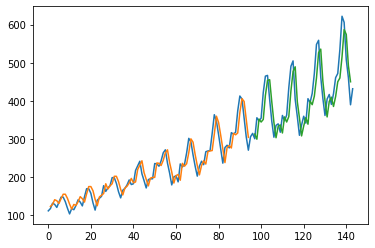

In [20]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM For Regression Using the Window Method

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [22]:
# fix random seed for reproducibility
numpy.random.seed(7)

##### Reading dataset

In [24]:
# load the dataset
dataframe = read_csv('/home/hasan/DATA SET/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')


##### Normalize dataset

In [25]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


##### Dividing train test

In [26]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


##### Dividing dataset

In [27]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [28]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


##### Reshape dataset

In [29]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


##### Model

In [32]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,look_back)))
model.add(Dense(1))


In [33]:
#Model Summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 4)                 128       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [35]:
#compile Model
model.compile(loss='mean_squared_error', 
              optimizer='adam')

##### Fit Model

In [36]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
 - 1s - loss: 0.0496
Epoch 2/100
 - 0s - loss: 0.0204
Epoch 3/100
 - 0s - loss: 0.0135
Epoch 4/100
 - 0s - loss: 0.0115
Epoch 5/100
 - 0s - loss: 0.0100
Epoch 6/100
 - 0s - loss: 0.0087
Epoch 7/100
 - 0s - loss: 0.0074
Epoch 8/100
 - 0s - loss: 0.0063
Epoch 9/100
 - 0s - loss: 0.0054
Epoch 10/100
 - 0s - loss: 0.0047
Epoch 11/100
 - 0s - loss: 0.0041
Epoch 12/100
 - 0s - loss: 0.0037
Epoch 13/100
 - 0s - loss: 0.0035
Epoch 14/100
 - 0s - loss: 0.0034
Epoch 15/100
 - 0s - loss: 0.0032
Epoch 16/100
 - 0s - loss: 0.0031
Epoch 17/100
 - 0s - loss: 0.0031
Epoch 18/100
 - 0s - loss: 0.0028
Epoch 19/100
 - 0s - loss: 0.0030
Epoch 20/100
 - 0s - loss: 0.0031
Epoch 21/100
 - 0s - loss: 0.0030
Epoch 22/100
 - 0s - loss: 0.0029
Epoch 23/100
 - 0s - loss: 0.0028
Epoch 24/100
 - 0s - loss: 0.0029
Epoch 25/100
 - 0s - loss: 0.0029
Epoch 26/100
 - 0s - loss: 0.0028
Epoch 27/100
 - 0s - loss: 0.0027
Epoch 28/100
 - 0s - loss: 0.0026
Epoch 29/100
 - 0s - loss: 0.0027
Epoch 30/100
 - 0s - lo

##### Predict

In [37]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


##### Inverse Prediction

In [38]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


##### mean squared error

In [40]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 22.47 RMSE
Test Score: 49.90 RMSE


##### Visualize

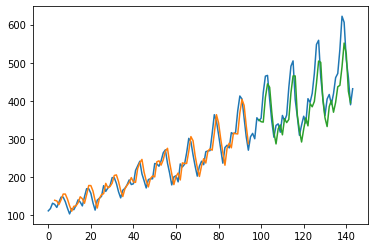

In [41]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# LSTM For Regression with Time Steps

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [43]:
# fix random seed for reproducibility
np.random.seed(7)

##### Reading dataset

In [47]:
# load the dataset
dataframe = read_csv('/home/hasan/DATA SET/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')


##### Normalize dataset

In [48]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


##### Dividing train test

In [49]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


##### Dividing dataset

In [50]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [51]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


##### Reshape dataset

In [52]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

##### Model

In [64]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,1)))
model.add(Dense(1))


In [65]:
#Model Summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [66]:
#compile Model
model.compile(loss='mean_squared_error', 
              optimizer='adam')

##### Fit Model

In [67]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
 - 1s - loss: 0.0398
Epoch 2/100
 - 0s - loss: 0.0172
Epoch 3/100
 - 0s - loss: 0.0145
Epoch 4/100
 - 0s - loss: 0.0133
Epoch 5/100
 - 0s - loss: 0.0120
Epoch 6/100
 - 0s - loss: 0.0107
Epoch 7/100
 - 0s - loss: 0.0095
Epoch 8/100
 - 0s - loss: 0.0082
Epoch 9/100
 - 0s - loss: 0.0073
Epoch 10/100
 - 0s - loss: 0.0063
Epoch 11/100
 - 0s - loss: 0.0056
Epoch 12/100
 - 0s - loss: 0.0050
Epoch 13/100
 - 0s - loss: 0.0047
Epoch 14/100
 - 0s - loss: 0.0045
Epoch 15/100
 - 0s - loss: 0.0044
Epoch 16/100
 - 0s - loss: 0.0042
Epoch 17/100
 - 0s - loss: 0.0041
Epoch 18/100
 - 0s - loss: 0.0041
Epoch 19/100
 - 0s - loss: 0.0040
Epoch 20/100
 - 0s - loss: 0.0040
Epoch 21/100
 - 0s - loss: 0.0040
Epoch 22/100
 - 0s - loss: 0.0041
Epoch 23/100
 - 0s - loss: 0.0040
Epoch 24/100
 - 0s - loss: 0.0040
Epoch 25/100
 - 0s - loss: 0.0039
Epoch 26/100
 - 0s - loss: 0.0040
Epoch 27/100
 - 0s - loss: 0.0040
Epoch 28/100
 - 0s - loss: 0.0041
Epoch 29/100
 - 0s - loss: 0.0039
Epoch 30/100
 - 0s - lo

##### Predict

In [68]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


##### Inverse Prediction

In [69]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


##### mean squared error

In [71]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 23.19 RMSE
Test Score: 58.08 RMSE


##### Visualize

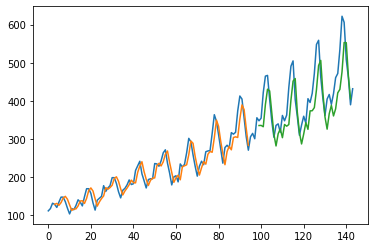

In [72]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# LSTM With Memory Between Batches

In [ ]:
#change of previous code
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [74]:
# fix random seed for reproducibility
np.random.seed(7)

##### Reading dataset

In [75]:
# load the dataset
dataframe = pd.read_csv('/home/hasan/DATA SET/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

##### Normalize data

In [76]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

##### dividing dataset

In [77]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

##### dividing data into train test

In [78]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [79]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

##### reshape

In [80]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

##### Model

In [81]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))

In [82]:
#model summary
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (1, 3, 4)                 96        
_________________________________________________________________
lstm_13 (LSTM)               (1, 4)                    144       
_________________________________________________________________
dense_9 (Dense)              (1, 1)                    5         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [83]:
#model compile
model.compile(loss='mean_squared_error', 
              optimizer='adam')

##### fit model

In [84]:
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

Epoch 1/1
 - 1s - loss: 0.0052
Epoch 1/1
 - 0s - loss: 0.0080
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0062
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0060
Epoch 1/1
 - 0s - loss: 0.0059
Epoch 1/1
 - 0s - loss: 0.0058
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0054
Epoch 1/1
 - 0s - loss: 0.0054
Epoch 1/1
 - 0s - loss: 0.0054
Epoch 1/1
 - 0s - loss: 0.0054
Epoch 1/1
 - 0s - loss: 0.0054
Epoch 1/1
 - 0s - loss: 0.0053
Epoch 1/1
 - 0s - loss: 0.0053
Epoch 1/1
 - 0s - loss: 0.0053
Epoch 1/1
 - 0s - loss: 0.0053
Epoch 1/1
 - 0s - loss: 0.0053
Epoch 1/1
 - 0s - loss: 0.0052
Epoch 1/

##### prediction

In [85]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

##### invert prediction

In [86]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

##### RMSE

In [87]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 20.56 RMSE
Test Score: 64.92 RMSE


##### Visualize

In [88]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

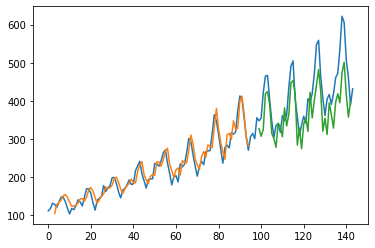

In [89]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()